In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from dataset import *
from Examples.Functions_examples import *

## Load Data

#### Load raw data from pickle file

In [2]:
data = load_pickle('../Data/Dataset_4subjects_Exe_Obs')

#### Select participant and session

In [3]:
session = data['s6']['sess1']

## Separate into trials

In [4]:
d = get_trials(session, 2048)
d[0].shape

(106, 14336)

## Analyze psd

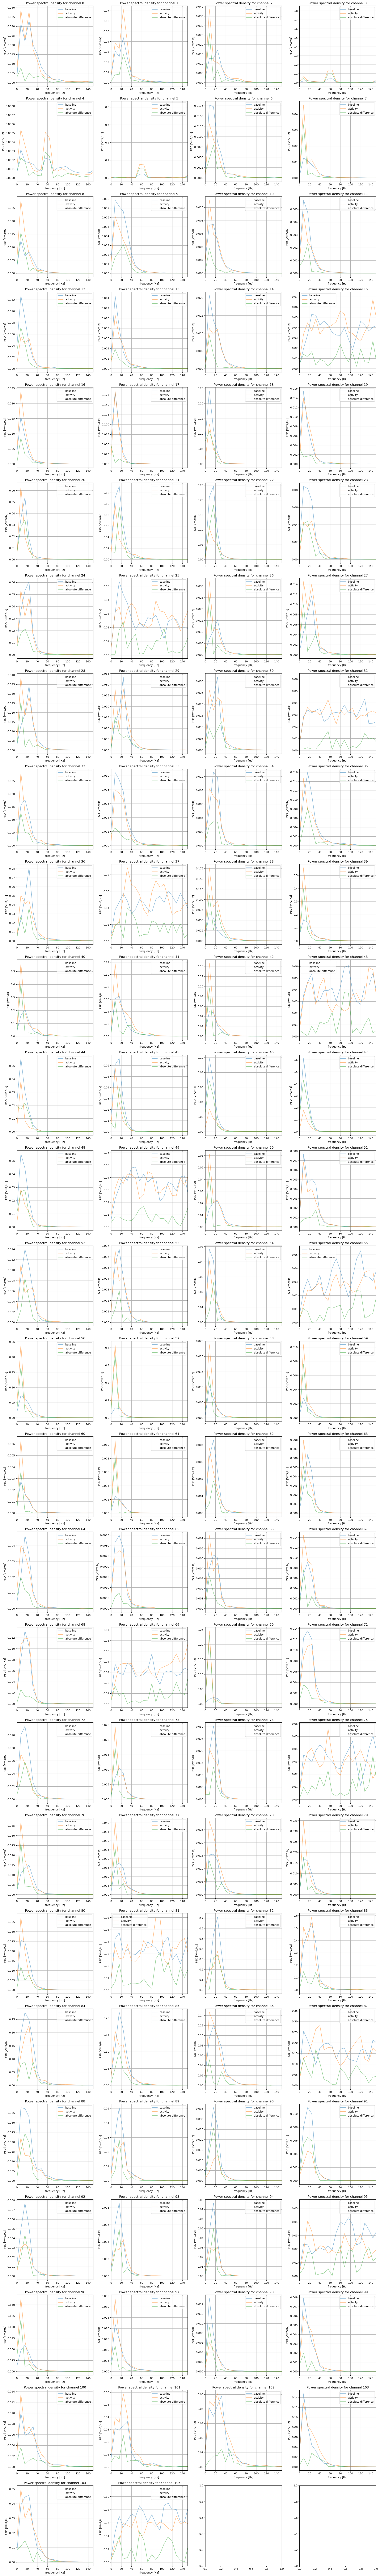

In [12]:
num_channels = len(session['channel_labels'])
fps = 2048

baseline_psd, activity_psd, diff_psd, corr, cohe, ttests = analyze_differences_between_baseline_and_activity(session, num_channels, plot = True)

In [13]:
responsive_channels = []
for i in range(len(ttests)):
    if 0 < ttests[i].pvalue < 0.05:
        responsive_channels.append(i)
        
print('Number of channels : ', len(responsive_channels))        
print(responsive_channels)

Number of channels :  8
[9, 33, 44, 71, 87, 95, 101, 105]


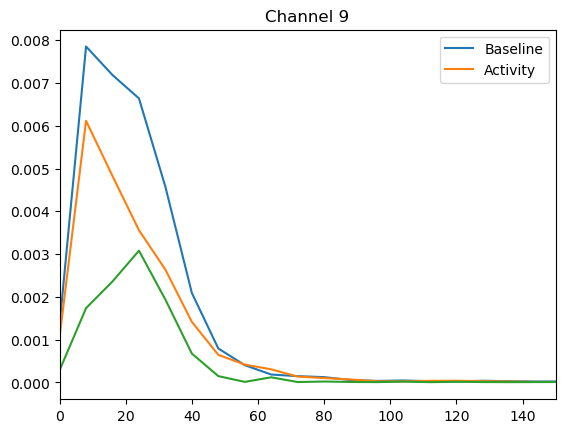

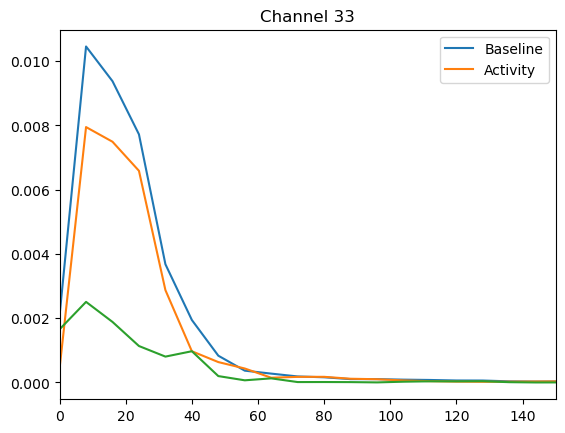

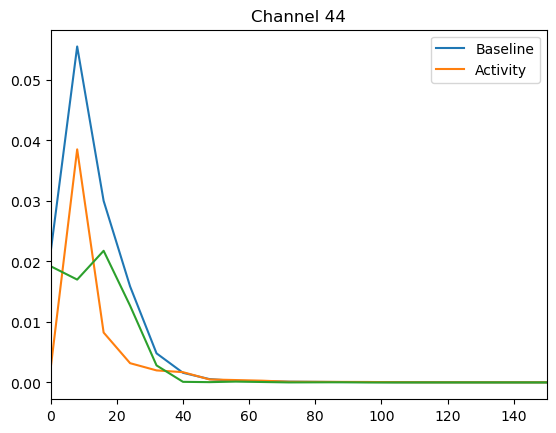

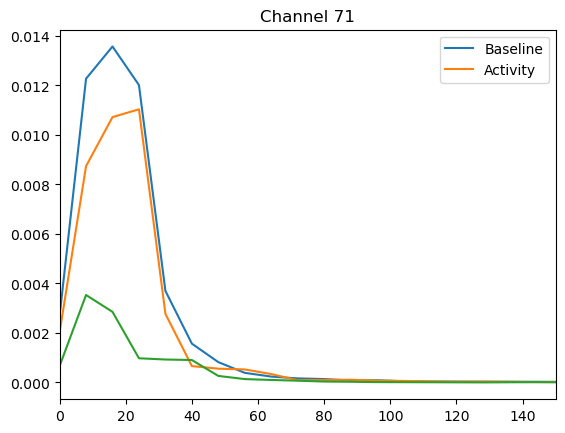

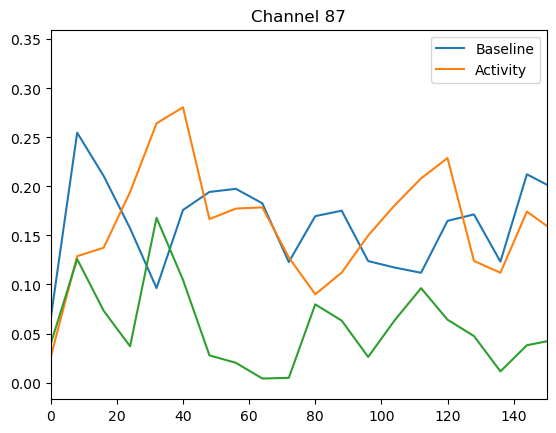

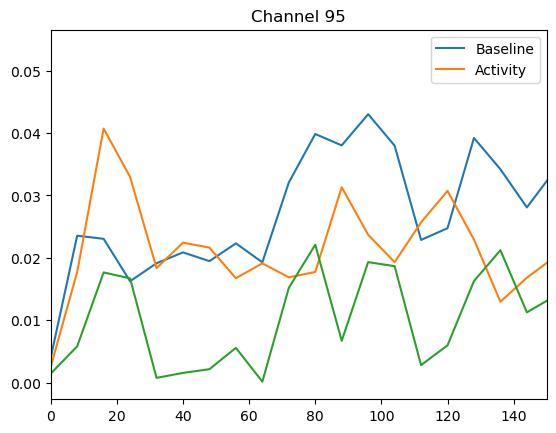

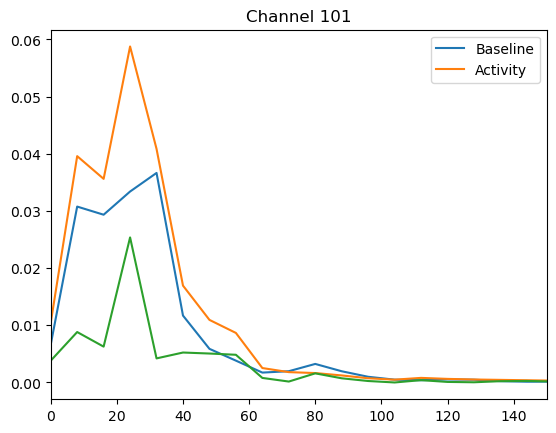

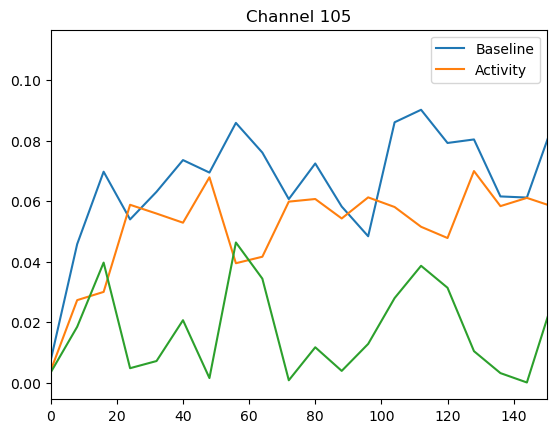

In [14]:
for i in responsive_channels:
    plt.plot(baseline_psd[i][0], baseline_psd[i][1])
    plt.plot(activity_psd[i][0], activity_psd[i][1])
    plt.plot(baseline_psd[i][0], diff_psd[i])
    plt.title(f'Channel {i}')
    plt.legend(['Baseline', 'Activity'])
    plt.xlim(0, 150)
    plt.show()

## Test using Leonardo's Functions

In [448]:
session['trials_info'].keys()

dict_keys(['ParticipantID', 'SessionType', 'SessionID', 'Handness', 'HandUsed', 'ElectrodeHemis', 'TrialID', 'BlockTimeCode', 'ObjectID', 'ActionType', 'CueType', 'ObjectSize', 'ObjectColor', 'ObjectPosition', 'CueColor', 'inBaseDuration', 'inCueDuration', 'inWaitToGoDuration', 'inTimeOut', 'TS_BlockCode', 'TS_TrialStart', 'TS_CueOn', 'TS_CueOff', 'TS_GoSignal', 'TS_HandOut', 'TS_ObjectGrasp', 'TS_ObjectReplace', 'TS_HandBack', 'ErrorCode', 'ErrorType', 'ObjectGrasped', 'ObjectTargeted', 'CorrectGrasped', 'CatchMistakeDetected', 'Dur_Baseline', 'Dur_Cue', 'Dur_WaitToGo', 'Dur_ReacTime', 'Dur_Reaching', 'Dur_Grasped', 'Dur_GoBack', 'Outfile', 'Note', 'BlockTimeStamp', 'TimeRef_Mat', 'TimeRef_Pulse', 'SyncError_ms', 'TrialFound', 'BlockID', 'p_BlockTimeCode', 'p_TS_BlockCode', 'p_TS_TrialStart', 'p_TS_CueOn', 'p_TS_GoSignal', 'p_TS_HandOut', 'p_TS_ObjectGrasp', 'p_TS_ObjectReplace', 'p_TS_HandBack', 'SyncError_Trend', 'SyncError_Trend_ttest', 'SequenceError_ms', 'SequenceErrorSum_ms', 'S

In [450]:
data_epoched = epoch_trials_precise_segments(data,'TS_TrialStart', 'TS_HandBack')

In [461]:
len(data_epoched['s6']['sess1']['timestamps']['TS_TrialStart'])

296